<a href="https://colab.research.google.com/github/FacuRoffet99/PDI/blob/main/practico_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Práctico 4 - Procesamiento Digital de Imágenes

In [1]:
import imageio
import numpy as np
import matplotlib.pyplot as plt
# %matplotlib inline

In [2]:
MAT_RGB2YIQ = np.array([[0.299, 0.587, 0.114],
                        [0.596,-0.275,-0.321],
                        [0.211,-0.523, 0.311]])

def apply_matrix(img, M):
    return np.matmul(img.reshape((-1,3)), M.T).reshape(img.shape)

def rgb2yiq(img):
    return apply_matrix(img, MAT_RGB2YIQ)

def yiq2rgb(img):
    return apply_matrix(img, np.linalg.inv(MAT_RGB2YIQ))

def rmse(img1, img2):
    return np.sqrt(np.mean((img1-img2)**2))

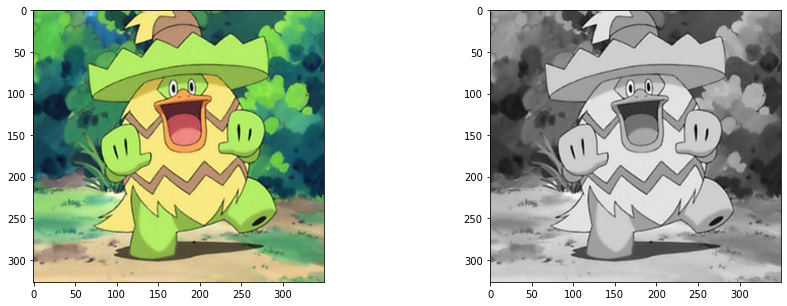

In [3]:
url = 'https://assets.pokemon.com/assets/cms2/img/watch-pokemon-tv/seasons/season07/season07_ep27_ss04.jpg'

img_rgb = imageio.imread(url)[:,100:450,:]/255
img = rgb2yiq(img_rgb)[:,:,0]

_, axes = plt.subplots(1, 2, figsize=(15,5))
axes[0].imshow(img_rgb)
axes[1].imshow(img, 'gray')

# Transformada Discreta de Fourier 

1. Calcular y mostrar el espectro en módulo y fase de una imagen en escala de grises. Mostrar el módulo en escala logarítmica
2. Encuentre una transformada para la amplitud y una para la fase que permita guardar el espectro en imágenes de 8 bit perdiendo la menor cantidad de información posible
3. Implementar la transformada inversa que convierta el espectro guardado en imágenes de 8 bit en la imagen original 
4. Calcular el error medio cuadrático de ir y volver a la imagen de 8bit
5. Guardar tp4.png como tp4_amp.png y tp4_phase.png. Corregir la tp4_amp.png con MS Paint o similar. Leer el espectro modificado y reconstruir la imagen.

## Funciones (para 1., 2. y 3.)

In [4]:
import cv2

def show_spectrum(Xm, Xp):

  # Graficar espectros de amplitud y fase
  fig, axes = plt.subplots(1, 2, figsize=(15,5))
  axes[0].imshow(Xm, 'gray')
  axes[0].set_title('Módulo')
  axes[1].imshow(Xp, 'gray')
  axes[1].set_title('Fase')


def fourier(img, show=False):

  # Transformada de Fourier
  n_pix = np.prod(img.shape[0:2])
  X = np.fft.fftshift(np.fft.fft2(img)) / n_pix
  # Pasar a módulo y fase
  Xm = np.abs(X)
  Xp = np.angle(X) 
  # Transformación propia
  Xm = np.log(10000*Xm+1) / np.log(10001)
  Xp = (Xp + np.pi) / (2*np.pi) 
  # Mostrar espectro (si corresponde)
  if show:
    show_spectrum(Xm, Xp)  

  return Xm, Xp


def inv_fourier(Xm, Xp):

  # Inversa de la transformación propia
  Xm = (np.exp(Xm * np.log(10001)) - 1) / 10000
  Xp = 2*np.pi * Xp - np.pi
  # Pasar a números complejos
  X = Xm * np.cos(Xp) + (Xm * np.sin(Xp))*1j
  # Transformada inversa de Fourier
  n_pix = np.prod(Xm.shape[0:2])
  img = np.fft.ifft2(np.fft.ifftshift(X*n_pix))

  return np.real(img)

## 1.

True

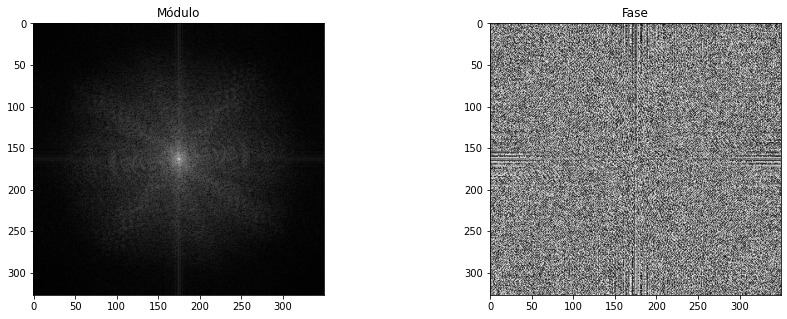

In [6]:
# Obtengo y muestro los espectros aplicando la transformada de Fourier
Xm, Xp = fourier(img, True)

# Guardo espectros como imágenes
cv2.imwrite('amp.png', Xm*255)
cv2.imwrite('phase.png', Xp*255)

## 3.

Text(0.5, 1.0, 'Reconstruida')

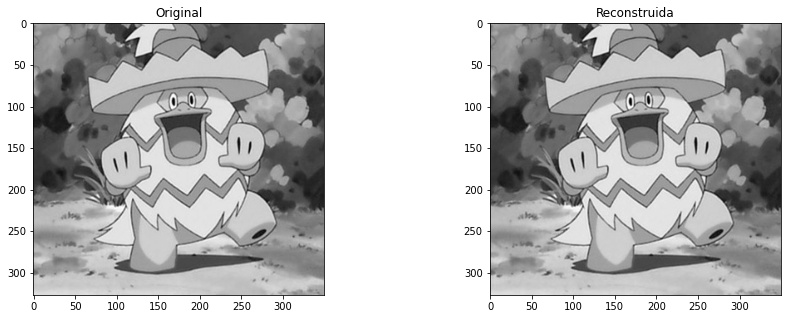

In [7]:
# Abro los espectros
img_amp = imageio.imread('amp.png')/255
img_phase = imageio.imread('phase.png')/255

# Reconstruyo la imagen aplicando la transformada inversa de Fourier
img_reconstructed = inv_fourier(img_amp, img_phase)

# Muestro la imagen original y la reconstruida
fig, axes = plt.subplots(1, 2, figsize=(15,5))
axes[0].imshow(img, 'gray')
axes[0].set_title('Original')
axes[1].imshow(img_reconstructed, 'gray')
axes[1].set_title('Reconstruida')

## 4.

In [8]:
# Calculo el error cuadrático medio
print(rmse(img, img_reconstructed))

0.0031359478981751172


## 5.

True

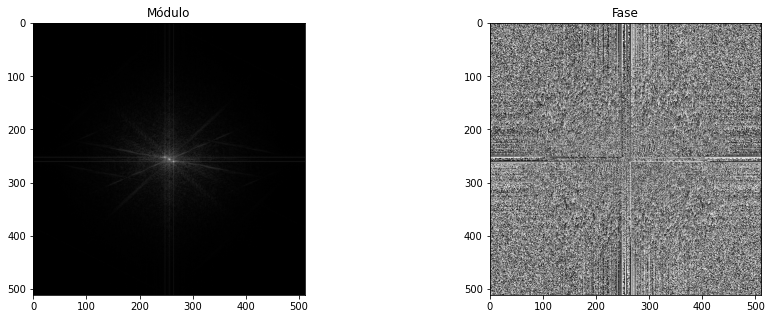

In [23]:
# Leer imagen
tp4 = imageio.imread('tp4.png')/255

# Obtengo y muestro los espectros aplicando la transformada de Fourier
Xm, Xp = fourier(tp4, True)

# Guardo espectros como imágenes
cv2.imwrite('tp4_amp.png', Xm*255)
cv2.imwrite('tp4_phase.png', Xp*255)

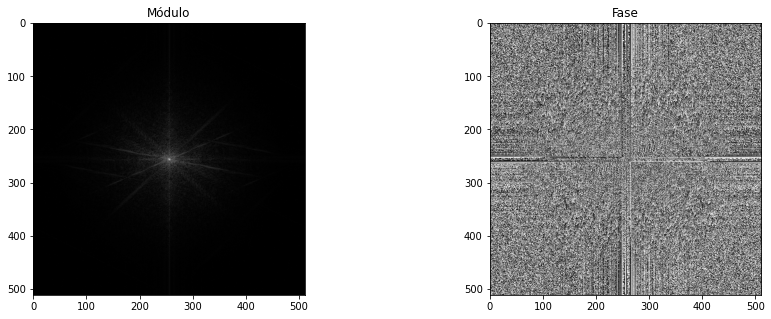

In [39]:
# Abro y muestro los espectros modificados en Paint
tp4_amp_mod = imageio.imread('tp4_amp_mod.png')[:,:,0]/255
tp4_phase = imageio.imread('tp4_phase.png')/255
show_spectrum(tp4_amp_mod, tp4_phase)

Text(0.5, 1.0, 'Reconstruida')

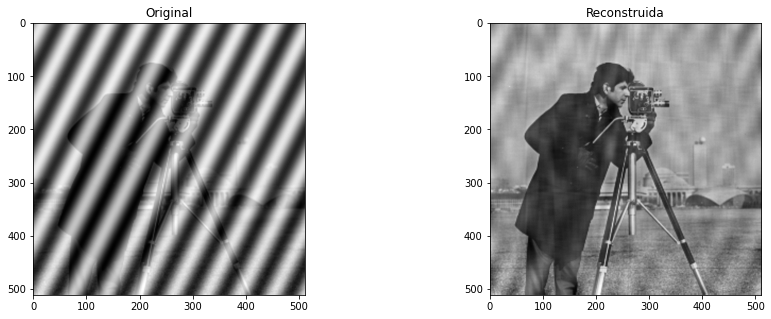

In [40]:
# Reconstruyo la imagen aplicando la transformada inversa de Fourier
tp4_reconstructed = inv_fourier(tp4_amp_mod, tp4_phase)

# Muestro la imagen original y la reconstruida
fig, axes = plt.subplots(1, 2, figsize=(15,5))
axes[0].imshow(tp4, 'gray')
axes[0].set_title('Original')
axes[1].imshow(tp4_reconstructed, 'gray')
axes[1].set_title('Reconstruida')